# Polynomial Regression, Regularization with Lasso and Ridge Regression

<b>Goals</b>

- Polynomial, Lasso, and Ridge regression. How they work and how to use them.
- The concept of Regularization. Why it's used and how it relates to the external bias vs variance problem.

## Polynomial regression

So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

We're going to use polynomial terms (squares, cubes, etc..) on a regression equation for the purpose of fitting non-linear data, which is data cannot be fit using a least squares model.

![formula](http://www.statisticshowto.com/wp-content/uploads/2015/01/excel-polynomial-regression.png)




#### Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  

In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


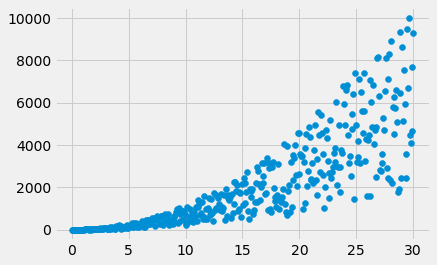

In [4]:
#Make random data to plot
#Input variable of 300 numbers from 0 to 30
X = np.linspace(0, 30, 400)
#Square x and assign it to y
y = (X**2)
#Throw in some randomness into y
y = y*(np.random.rand(400)*10+ 2)
#plt x and y
plt.style.use('fivethirtyeight')
plt.scatter(X, y)
plt.show()

Our data is clearly non linear but let's go ahead fit a linear model on it.

In [5]:
X.shape

(400,)

In [6]:
X

array([ 0.        ,  0.07518797,  0.15037594,  0.22556391,  0.30075188,
        0.37593985,  0.45112782,  0.52631579,  0.60150376,  0.67669173,
        0.7518797 ,  0.82706767,  0.90225564,  0.97744361,  1.05263158,
        1.12781955,  1.20300752,  1.27819549,  1.35338346,  1.42857143,
        1.5037594 ,  1.57894737,  1.65413534,  1.72932331,  1.80451128,
        1.87969925,  1.95488722,  2.03007519,  2.10526316,  2.18045113,
        2.2556391 ,  2.33082707,  2.40601504,  2.48120301,  2.55639098,
        2.63157895,  2.70676692,  2.78195489,  2.85714286,  2.93233083,
        3.0075188 ,  3.08270677,  3.15789474,  3.23308271,  3.30827068,
        3.38345865,  3.45864662,  3.53383459,  3.60902256,  3.68421053,
        3.7593985 ,  3.83458647,  3.90977444,  3.98496241,  4.06015038,
        4.13533835,  4.21052632,  4.28571429,  4.36090226,  4.43609023,
        4.5112782 ,  4.58646617,  4.66165414,  4.73684211,  4.81203008,
        4.88721805,  4.96240602,  5.03759398,  5.11278195,  5.18

In [7]:
a = X.reshape(-1,1)
a.shape

(400, 1)

In [8]:
a

array([[ 0.        ],
       [ 0.07518797],
       [ 0.15037594],
       [ 0.22556391],
       [ 0.30075188],
       [ 0.37593985],
       [ 0.45112782],
       [ 0.52631579],
       [ 0.60150376],
       [ 0.67669173],
       [ 0.7518797 ],
       [ 0.82706767],
       [ 0.90225564],
       [ 0.97744361],
       [ 1.05263158],
       [ 1.12781955],
       [ 1.20300752],
       [ 1.27819549],
       [ 1.35338346],
       [ 1.42857143],
       [ 1.5037594 ],
       [ 1.57894737],
       [ 1.65413534],
       [ 1.72932331],
       [ 1.80451128],
       [ 1.87969925],
       [ 1.95488722],
       [ 2.03007519],
       [ 2.10526316],
       [ 2.18045113],
       [ 2.2556391 ],
       [ 2.33082707],
       [ 2.40601504],
       [ 2.48120301],
       [ 2.55639098],
       [ 2.63157895],
       [ 2.70676692],
       [ 2.78195489],
       [ 2.85714286],
       [ 2.93233083],
       [ 3.0075188 ],
       [ 3.08270677],
       [ 3.15789474],
       [ 3.23308271],
       [ 3.30827068],
       [ 3

0.6871164400588511


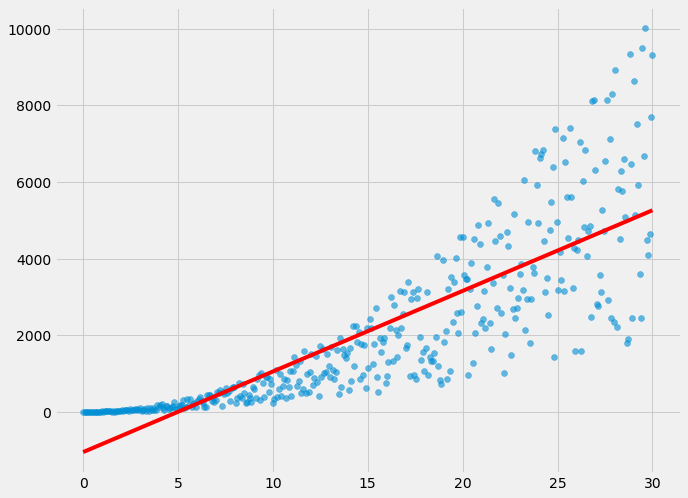

In [9]:
#Reshape X
X = X.reshape(-1, 1)

#Intialize linear regression model

lr = LinearRegression()

#Fit model
lr.fit(X, y)

#Make predictions
preds = lr.predict(X)

#Print score
print (lr.score(X, y))
#plot data and predictions
plt.figure(figsize=(10, 8))
plt.scatter(X, y, alpha=.6)
plt.plot(X, preds, "r", linewidth = 4)
plt.show()

How good is the fit?

Let's use polynomial regression to model this.

In [10]:
#Intialize Polynomial Features object with degree = 2

poly2 = PolynomialFeatures(degree=2)

#fit and transform Polynomial object on data, set equal to X2
X2 = poly2.fit_transform(X)

In [11]:
#X2 shape
X2.shape

(400, 3)

In [12]:
X2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.51879699e-02, 5.65323082e-03],
       [1.00000000e+00, 1.50375940e-01, 2.26129233e-02],
       ...,
       [1.00000000e+00, 2.98496241e+01, 8.91000057e+02],
       [1.00000000e+00, 2.99248120e+01, 8.95494375e+02],
       [1.00000000e+00, 3.00000000e+01, 9.00000000e+02]])

In [13]:
#Look at first column
X2[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
#Look at second column
X2[:,1]

array([ 0.        ,  0.07518797,  0.15037594,  0.22556391,  0.30075188,
        0.37593985,  0.45112782,  0.52631579,  0.60150376,  0.67669173,
        0.7518797 ,  0.82706767,  0.90225564,  0.97744361,  1.05263158,
        1.12781955,  1.20300752,  1.27819549,  1.35338346,  1.42857143,
        1.5037594 ,  1.57894737,  1.65413534,  1.72932331,  1.80451128,
        1.87969925,  1.95488722,  2.03007519,  2.10526316,  2.18045113,
        2.2556391 ,  2.33082707,  2.40601504,  2.48120301,  2.55639098,
        2.63157895,  2.70676692,  2.78195489,  2.85714286,  2.93233083,
        3.0075188 ,  3.08270677,  3.15789474,  3.23308271,  3.30827068,
        3.38345865,  3.45864662,  3.53383459,  3.60902256,  3.68421053,
        3.7593985 ,  3.83458647,  3.90977444,  3.98496241,  4.06015038,
        4.13533835,  4.21052632,  4.28571429,  4.36090226,  4.43609023,
        4.5112782 ,  4.58646617,  4.66165414,  4.73684211,  4.81203008,
        4.88721805,  4.96240602,  5.03759398,  5.11278195,  5.18

In [15]:
#Third column

X2[:,2]

array([0.00000000e+00, 5.65323082e-03, 2.26129233e-02, 5.08790774e-02,
       9.04516931e-02, 1.41330771e-01, 2.03516310e-01, 2.77008310e-01,
       3.61806773e-01, 4.57911697e-01, 5.65323082e-01, 6.84040929e-01,
       8.14065238e-01, 9.55396009e-01, 1.10803324e+00, 1.27197693e+00,
       1.44722709e+00, 1.63378371e+00, 1.83164679e+00, 2.04081633e+00,
       2.26129233e+00, 2.49307479e+00, 2.73616372e+00, 2.99055910e+00,
       3.25626095e+00, 3.53326926e+00, 3.82158404e+00, 4.12120527e+00,
       4.43213296e+00, 4.75436712e+00, 5.08790774e+00, 5.43275482e+00,
       5.78890836e+00, 6.15636836e+00, 6.53513483e+00, 6.92520776e+00,
       7.32658714e+00, 7.73927299e+00, 8.16326531e+00, 8.59856408e+00,
       9.04516931e+00, 9.50308101e+00, 9.97229917e+00, 1.04528238e+01,
       1.09446549e+01, 1.14477924e+01, 1.19622364e+01, 1.24879869e+01,
       1.30250438e+01, 1.35734072e+01, 1.41330771e+01, 1.47040534e+01,
       1.52863361e+01, 1.58799254e+01, 1.64848211e+01, 1.71010232e+01,
      

What do you see?

The first column is an intercept, the second is the original, and the third is the transformed column.

Now let's throw this into our model.

In [16]:
#Intialize model
lr = LinearRegression()

#fit model on X2 
lr.fit(X2, y)

#Make predictions
preds = lr.predict(X2)

#Score model
print (lr.score(X2, y))

print (r2_score(y, preds))


0.732246806441816
0.732246806441816


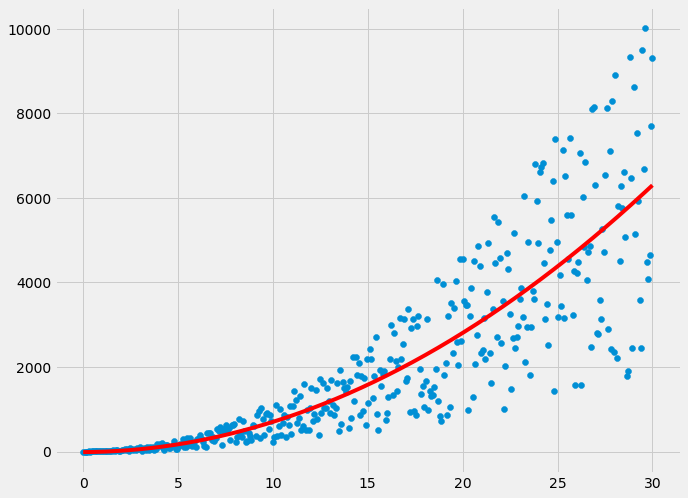

In [17]:
#Plot data and predictions

plt.figure(figsize=(10, 8))
#Plot the original X data versus
plt.scatter(X, y)
#Plot line plot of X and the new predictions
plt.plot(X, preds, color='r')


Voila, here's our polynomial regression plot.

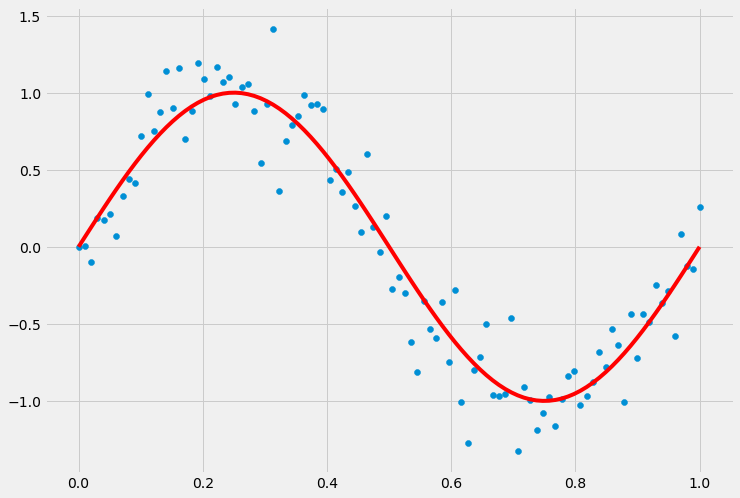

In [18]:

#Set random seeed
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# This returns 100 evenly spaced numbers from 0 to 1
X = np.linspace(0, 1, 100)

n_samples = 100

#Pass X into f and add random data to jitter data
y = f(X) + np.random.normal(scale=0.2, size=n_samples)

#Make "predictions" set equal to curve
curve = f(X)

# Plot the training data against what we know to be the ground truth sin function
plt.figure(figsize=(11, 8))
plt.scatter(X, y)
plt.plot(X, curve, color='r')
plt.show()

### Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We'll combine the PolynomialFeatures function with the [make_pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

In [19]:
X.shape

(100,)

In [20]:
X.reshape(-1,1).shape

(100, 1)

In [21]:

#Assign a variable pip to make_pipeline function that tkes in Polynom and Linreg objects
#Specify degree = 3
pipe = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

#Reshape X
Xrs = X.reshape(-1, 1)
#fit pipe object on X and y

pipe.fit(Xrs, y)

preds = pipe.predict(Xrs)

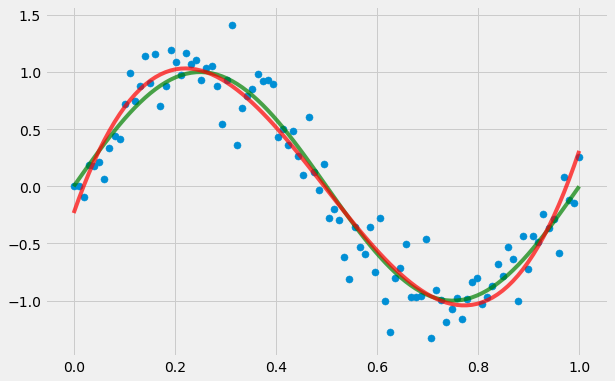

In [22]:
#Set size
plt.figure(figsize=(9, 6))
#Plot curve line
plt.plot(X, curve, color='g', alpha=.7)
#Scatter plot of data
plt.scatter(X, y, s=50)
#Plot predictions from pipe
plt.plot(Xrs, preds, color='r', alpha=.7)
# plt.legend()
plt.show()

What do you make of the fit?

The previous code in function form

In [23]:
# def polynomial_ploting(X, y, degree):
#     pipe = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
#     #Reshape X
#     Xrs = X.reshape(-1, 1)
#     #fit pipe object on X and y
#     pipe.fit(Xrs, y)
#     preds = pipe.predict(Xrs)
#     print ("R2 score is", pipe.score(Xrs, y))
#     plt.figure(figsize=(9, 6))
#     #Plot curve line
#     plt.plot(X, curve, label='Curve Line', linewidth = 3, color='green')
#     #Scatter plot of data
#     plt.scatter(X, y, label='data', s=100)
#     #Plot predictions from pipe
#     plt.plot(X, preds,label= "Predicted Line with {} degrees".format(degree),
#              linewidth = 3, color= "red")
#     plt.legend()
#     plt.show()

In [24]:
def polynomial_plotting(X,y,degree):
    pipe = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    Xrs = X.reshape(-1,1)
    plt.figure(figsize=(12,8))
    pipe.fit(Xrs, y)
    preds = pipe.predict(Xrs)
    plt.plot(X, f(X), color='r', alpha=.7)
    plt.scatter(X, y, s=100, alpha=.7)
    plt.plot(Xrs, preds, color='g', alpha=.7)

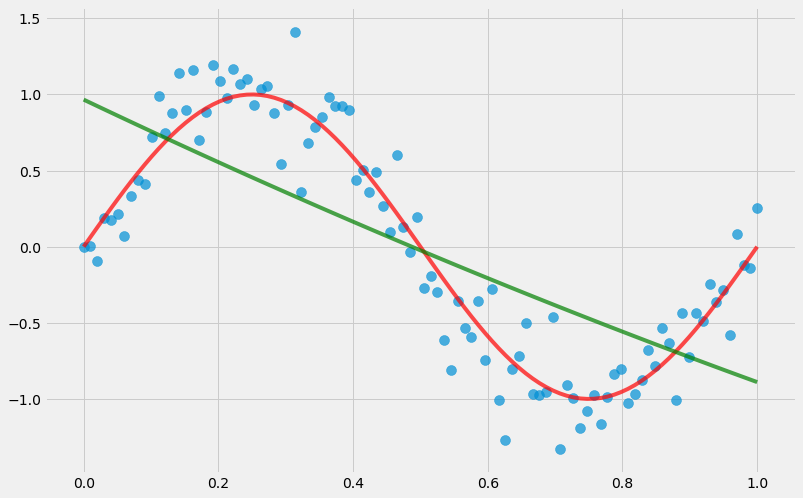

In [25]:
#Plot with 2 degrees
polynomial_plotting(X,y,2)

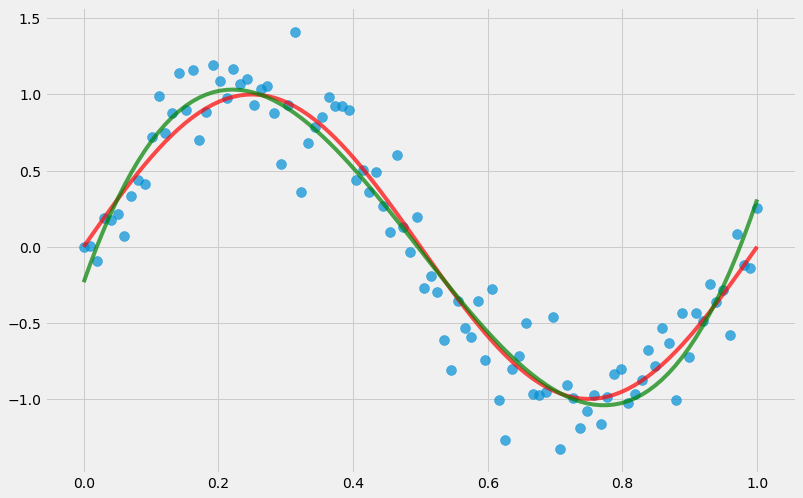

In [26]:
#Plot with 5 degrees
polynomial_plotting(X,y,3)

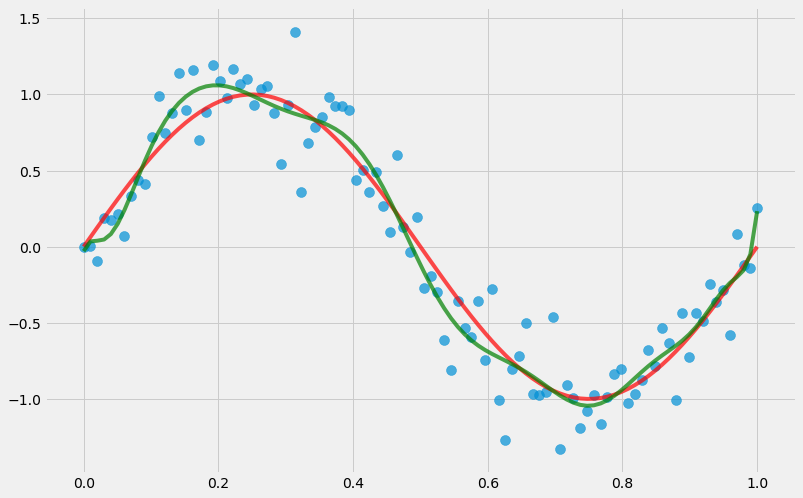

In [27]:
#15 Degrees
polynomial_plotting(X,y,15)

In [28]:
#27 degrees!


Let's go higher!

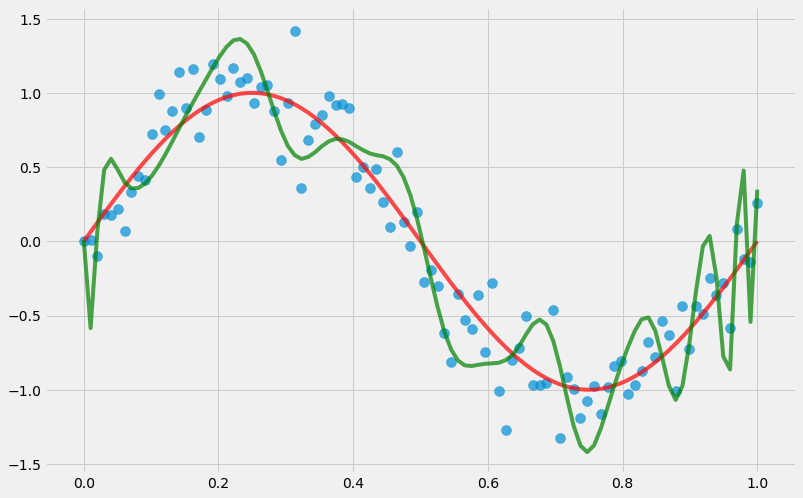

In [29]:
#60 Degrees
polynomial_plotting(X,y,60)

### What do you notice happens when we increase our degrees?

As the polynomial degree increase so does the overfitting of the model.

![overfit](images/reg_overfit.png)


## Regularization

In simple terms it is the penalty on a model's complexity. Regularization helps prevent overfitting by penalizing large coefficients.

- If your model is very complex (i.e., lots of features, large features, high degree polynomial fit, etc.), you need to worry more about overfitting.
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- Ridge and Lasso regression are two different regularization models.


![a](https://image.slidesharecdn.com/ch-4-demand-estimation2-110225045402-phpapp01/95/ch-4demandestimation2-11-728.jpg?cb=1298609672)

Ridge: It's function is the standard OLS function plus the squared value of each coefficient multipled by a constant/parameter (alpha) determined by you the data scientist. Similar to picking a K in a KNN model. 0 alpha equals OLS, very high alpha equals underfitting. Aka L2 regularization.
![ridge](images/ridge.png)

Lasso: OLS function plus the sum of the absolute values of each coefficient. Has an advantage over Ridge because it's great for feature selection because it shrinks values of insignificant features to 0. Aka L1 regularization.
![e](images/lasso.png)

In this next seciton we're going to model the boston housing dataset using linear, lasso, and ridge regression on both the original dataset and the 2-degree polynomial-transformed data.

In [30]:
# Load in boston dataset
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston["data"])
# df.columns = boston["feature_names"]
# df["MEDV"] = boston["target"]
# df.head()

In [31]:
from sklearn.datasets import load_boston

boston = load_boston()

In [32]:
type(boston)

sklearn.utils.Bunch

In [33]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [34]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

# df = pd.DataFrame(boston["data"])
# df.columns = boston["feature_names"]
# df["MEDV"] = boston["target"]

df['MEDV'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [36]:
df.MEDV.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [37]:
#Look at the data dictionary
boston["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

Modeling using the original data:

In [38]:
#Assign X and y

X = df.drop('MEDV', axis=1)
y = df.MEDV

In [39]:
#Fit and score a linear regression model

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)


0.7406077428649428

In [40]:
#Fit and score a ridge regression model with alpha = 10

ridge = Ridge(alpha=100)
ridge.fit(X,y)
ridge.score(X, y)


0.7178124385677699

In [41]:
#Fit and score a lasso regression model with alpha = 1

lasso = Lasso(alpha=1)
lasso.fit(X,y)
lasso.score(X,y)


0.6825494617506651

What do we make of these results? How do the regularized models compare to the linear one?

Let's examine the best features using lasso regression

In [42]:
#Assign the lasso coefficients to coef variable
coef = lasso.coef_
coef

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

In [43]:
lasso.intercept_

41.06608476848656

In [44]:
#Zip column names and coef
dict(zip(df.columns, lasso.coef_))

{'AGE': 0.020927367934403533,
 'B': 0.008291165953198497,
 'CHAS': 0.0,
 'CRIM': -0.06342254548584687,
 'DIS': -0.6690086385552514,
 'INDUS': -0.0,
 'LSTAT': -0.7614329574259159,
 'NOX': -0.0,
 'PTRATIO': -0.7231990135223445,
 'RAD': 0.26417500608389705,
 'RM': 0.9467856669597527,
 'TAX': -0.01520915140010354,
 'ZN': 0.04916866869026911}

In [45]:
sorted(dict(zip(df.columns, lasso.coef_)).items(), key=lambda x:x[1])

[('LSTAT', -0.7614329574259159),
 ('PTRATIO', -0.7231990135223445),
 ('DIS', -0.6690086385552514),
 ('CRIM', -0.06342254548584687),
 ('TAX', -0.01520915140010354),
 ('INDUS', -0.0),
 ('CHAS', 0.0),
 ('NOX', -0.0),
 ('B', 0.008291165953198497),
 ('AGE', 0.020927367934403533),
 ('ZN', 0.04916866869026911),
 ('RAD', 0.26417500608389705),
 ('RM', 0.9467856669597527)]

Lasso assigns a 0 to features it thinks are useless, so what matters is the magnitude and not the direction of the feature coefficient.

In [46]:
sorted(dict(zip(df.columns, ridge.coef_)).items(), key=lambda x:x[1])

[('DIS', -1.1531569675816162),
 ('PTRATIO', -0.8295033676548731),
 ('LSTAT', -0.6613120618725169),
 ('NOX', -0.26324522799945616),
 ('CRIM', -0.10145093577997438),
 ('INDUS', -0.05262565979593714),
 ('TAX', -0.01585229701979186),
 ('AGE', 0.0012301772806127462),
 ('B', 0.009471474467388982),
 ('ZN', 0.05446995371139822),
 ('RAD', 0.3149153692382454),
 ('CHAS', 0.6386467461196874),
 ('RM', 2.331965704106425)]

Now time to cross-validate with the three models.

In [47]:
#Use cross_val_score function on linear regression and set scoring = r2

cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2').mean()


0.35074135093250475

In [48]:
#Use cross_val_score function on ridge regression with alpha = 100 and set scoring = r2
cross_val_score(Ridge(alpha=100), X, y, cv=5, scoring='r2').mean()

0.4925442800033345

In [49]:
#Use cross_val_score function on lasso regression with alpha = 1 and set scoring = r2
cross_val_score(Lasso(alpha=1), X, y, cv=5, scoring='r2').mean()

0.4317689119232049

How do the cross-validated scores of the Lasso/Ridge regressions compare to that of Linear regression?

Let's try this exercise again but with the polynomial transformed features.

In [50]:
#Transform the features to 2-degrees
poly = PolynomialFeatures(2)

Xp = poly.fit_transform(X)


In [51]:
#Fit linear regression model on the Xp features and evaluate it on itself
lr = LinearRegression()
lr.fit(Xp,y)
lr.score(Xp, y)

0.9124770286416027

In [52]:
#Fit Ridge regression model with 1500000 alpha on the Xp features and evaluate it on itself
rid = Ridge(alpha=1500000)
rid.fit(Xp, y)
rid.score(Xp, y)


0.8395079390821558

In [53]:
#Fit Lasso regression model with 50 alpha on the Xp features and evaluate it on itself
las = Lasso(alpha=50)
las.fit(Xp, y)
las.score(Xp, y)


0.8202564856560935

How do the Ridge & Lasso scores compare to that of the Linear score?

Cross-validation time.

In [54]:
#Linear regression cross-validation

cross_val_score(LinearRegression(), Xp, y, cv=5, scoring='r2').mean()

-7.066573870844936

What does a negative r-squared score mean?

In [55]:
#Ridge regression cross-validation
cross_val_score(Ridge(1500000), Xp, y, cv=5, scoring='r2').mean()

0.4332163869018606

In [56]:
#Lasso regression cross-validation
cross_val_score(Lasso(50), Xp, y, cv=5, scoring='r2').mean()

0.4376840086036369

We've cross-validated six different data and algorithm combinations. What have we learned from this part?

**Class exercise:** 


- We're going to find the best alpha values for both ridge and lasso models trained on polynomial-transformed features.

- I want you plot a range of alpha values versus the cross validated r-squared scores aka a validation curve.


Ridge section:

In [57]:
#Pre-defined ridge_alphas
ridge_alphas = np.logspace(3, 7, 200)

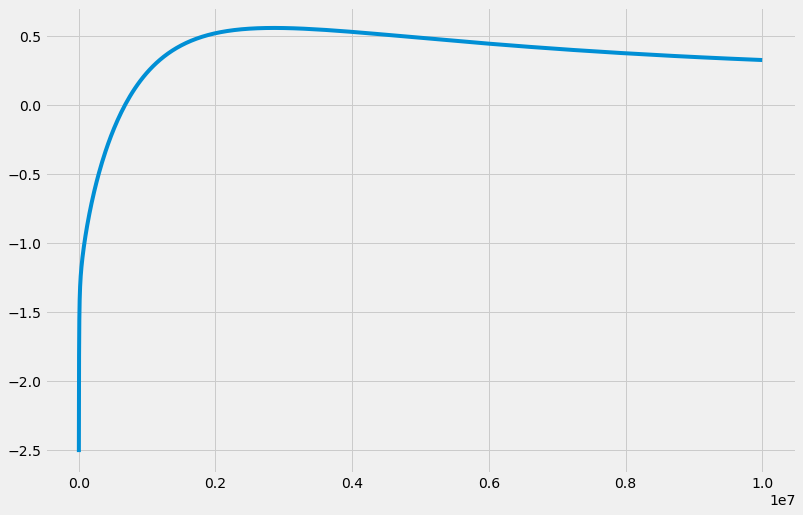

In [58]:
#answers

rscores = []

for alpha in ridge_alphas:
    model = Ridge(alpha)
    sc = cross_val_score(model, Xp, y, cv=5, scoring='r2').mean()
    rscores.append(sc)
    
plt.figure(figsize=(12,8))
plt.plot(ridge_alphas, rscores)


In [59]:
#Alpha values for lasso model
lasso_alphas = np.linspace(25, 160, 80)

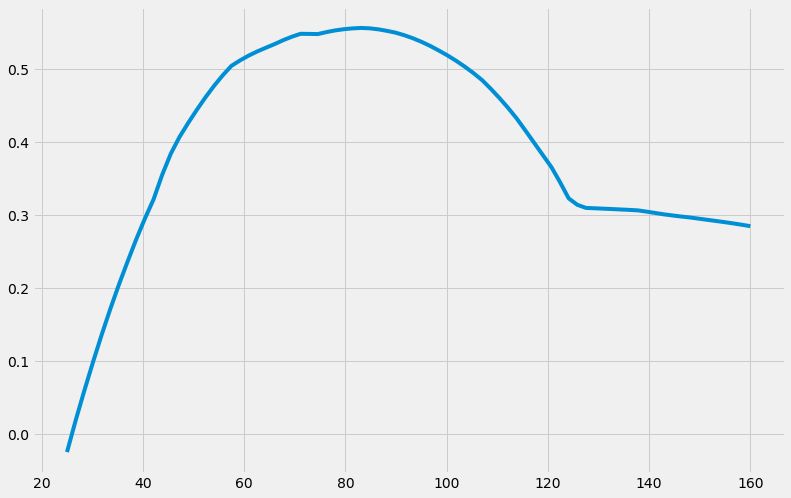

In [60]:
#Answer

lscores = []

for alpha in lasso_alphas:
    model = Lasso(alpha)
    sc = cross_val_score(model, Xp, y, cv=5, scoring='r2').mean()
    lscores.append(sc)
    
plt.figure(figsize=(12,8))
plt.plot(lasso_alphas, lscores)



## Regularized Polynomial Regression cont.

We're going to continue our lesson regularized polynomial regression by modeling higher degree data.

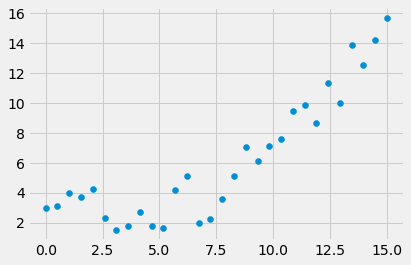

In [61]:
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)
plt.scatter(x_sample, y_sample)

In [62]:
# X = np.array([x_sample]).T
# for degree in [1, 3, 8, 13]:
#     model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
#     y_pred = model.predict(np.array([domain]).T)
#     plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

# plt.scatter(x_sample, func(x_sample))
# plt.legend(loc="upper left", bbox_to_anchor=(1,1))
# plt.show()

In [63]:
x_sample

array([ 0.        ,  0.51724138,  1.03448276,  1.55172414,  2.06896552,
        2.5862069 ,  3.10344828,  3.62068966,  4.13793103,  4.65517241,
        5.17241379,  5.68965517,  6.20689655,  6.72413793,  7.24137931,
        7.75862069,  8.27586207,  8.79310345,  9.31034483,  9.82758621,
       10.34482759, 10.86206897, 11.37931034, 11.89655172, 12.4137931 ,
       12.93103448, 13.44827586, 13.96551724, 14.48275862, 15.        ])

In [64]:
X = np.array([x_sample]).T
X

array([[ 0.        ],
       [ 0.51724138],
       [ 1.03448276],
       [ 1.55172414],
       [ 2.06896552],
       [ 2.5862069 ],
       [ 3.10344828],
       [ 3.62068966],
       [ 4.13793103],
       [ 4.65517241],
       [ 5.17241379],
       [ 5.68965517],
       [ 6.20689655],
       [ 6.72413793],
       [ 7.24137931],
       [ 7.75862069],
       [ 8.27586207],
       [ 8.79310345],
       [ 9.31034483],
       [ 9.82758621],
       [10.34482759],
       [10.86206897],
       [11.37931034],
       [11.89655172],
       [12.4137931 ],
       [12.93103448],
       [13.44827586],
       [13.96551724],
       [14.48275862],
       [15.        ]])

In [65]:
X_test = np.array([domain]).T
X_test

array([[ 0.        ],
       [ 0.01501502],
       [ 0.03003003],
       [ 0.04504505],
       [ 0.06006006],
       [ 0.07507508],
       [ 0.09009009],
       [ 0.10510511],
       [ 0.12012012],
       [ 0.13513514],
       [ 0.15015015],
       [ 0.16516517],
       [ 0.18018018],
       [ 0.1951952 ],
       [ 0.21021021],
       [ 0.22522523],
       [ 0.24024024],
       [ 0.25525526],
       [ 0.27027027],
       [ 0.28528529],
       [ 0.3003003 ],
       [ 0.31531532],
       [ 0.33033033],
       [ 0.34534535],
       [ 0.36036036],
       [ 0.37537538],
       [ 0.39039039],
       [ 0.40540541],
       [ 0.42042042],
       [ 0.43543544],
       [ 0.45045045],
       [ 0.46546547],
       [ 0.48048048],
       [ 0.4954955 ],
       [ 0.51051051],
       [ 0.52552553],
       [ 0.54054054],
       [ 0.55555556],
       [ 0.57057057],
       [ 0.58558559],
       [ 0.6006006 ],
       [ 0.61561562],
       [ 0.63063063],
       [ 0.64564565],
       [ 0.66066066],
       [ 0

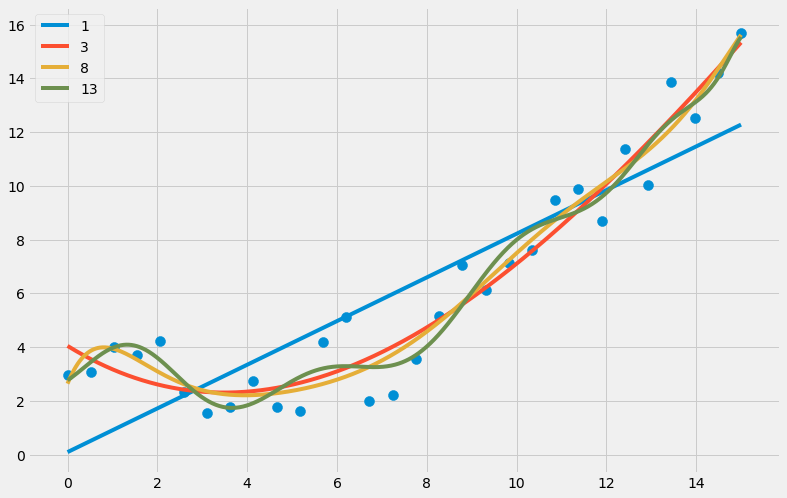

In [66]:
plt.figure(figsize=(12,8))
for degree in [1,3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y_sample)
    y_pred = model.predict(X_test)
#     plt.plot(X_test, y_pred)
    plt.plot(domain, y_pred, label=degree)
    plt.legend()
    
plt.scatter(x_sample, y_sample, s=100)

In [67]:
# plt.scatter(x_sample, func(x_sample), label="samples")
# for degree in [1, 2, 3, 4, 5]:
#     model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#     # Compute a few R2 scores and print average performance
#     scores = []
#     for k in range(5):
#         X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
#         scores.append(model.fit(X_train, y_train).score(X_test, y_test))
#     print ("For degree", degree, ", R2 =", np.mean(scores))
#     # Take last model to plot predictions
#     y_pred = model.predict(np.array([domain]).T)
#     plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

#     plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [68]:
def analyze_performance(test_model, X, y_sample):
    scores = {'overfit': {}, 'cv': {}}
    for degree in range(1, 20):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        cv_scores = []
        for k in range(5):  # Compute a few R2 scores and print average performance
            X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.8)
            cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
        scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

0.8722758522696331


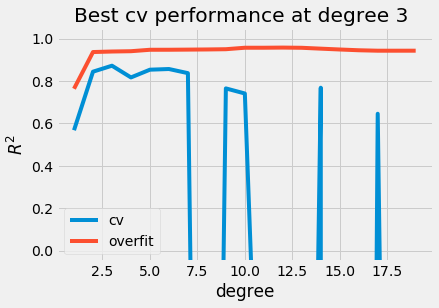

In [69]:
scores = analyze_performance(LinearRegression(), X, y_sample)
scores.plot(ylim=(-.05,1.05))

m = scores.cv.argmax()
print(scores.cv[m])
plt.title("Best cv performance at degree %d " % m), plt.xlabel('degree'), plt.ylabel('$R^2$');

In [78]:
def analyze_performance2(test_model, X, y_sample):
    scores = {'overfit':{}, 'cv': {}}
    for degree in range(1,20):
        poly = PolynomialFeatures(degree)
        Xp = poly.fit_transform(X)
        scores['overfit'][degree] = test_model.fit(Xp, y_sample).score(Xp, y_sample)
#         cv_scores = []
#         for i in range(5):
#             X_train, X_test, y_train, y_test = train_test_split(Xp, y_sample, test_size=.2)
#             cv_scores.append(test_model.fit(X_train, y_train).score(X_test, y_test))
#         scores['cv'][degree] = np.mean(cv_scores)
        scores['cv'][degree] = cross_val_score(test_model, Xp, y_sample, cv=5, scoring='r2').mean()
    return pd.DataFrame(scores)

max cv score:  -0.5917452459210525


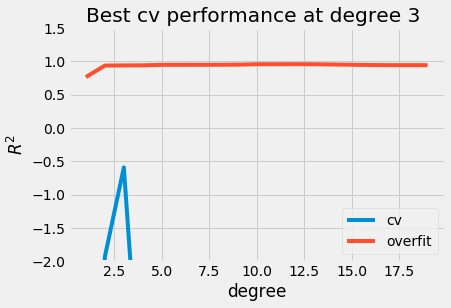

In [71]:
scores = analyze_performance2(LinearRegression(), X, y_sample)

scores.plot(ylim=(-2,1.5))
m = scores.cv.argmax()
print("max cv score: ",scores.cv[m])
plt.title("Best cv performance at degree %d " % m), plt.xlabel('degree'), plt.ylabel('$R^2$');

Don't run this code!

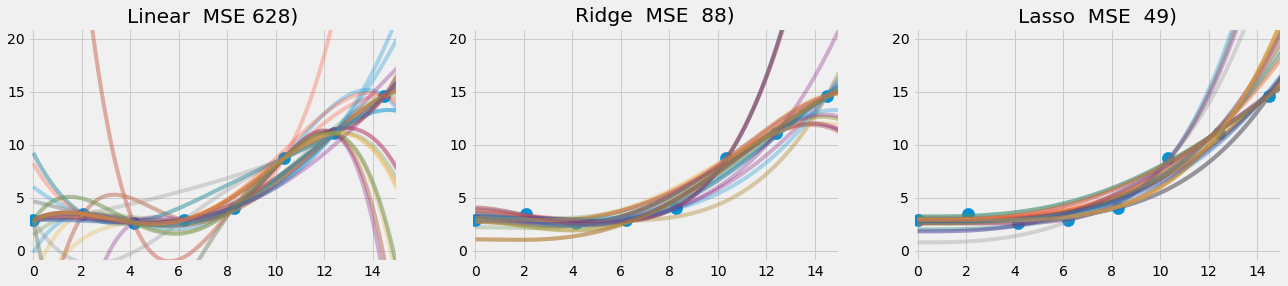

In [72]:
def polynomial_display():
    x_small_sample = x_sample[::4]
    y_small_sample = func(x_small_sample)

    degree, alpha = 4, 10

    X = np.array([x_small_sample]).T
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    m = ["Linear", "Ridge", "Lasso"]
    for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):    
        model = make_pipeline(PolynomialFeatures(degree), my_model)    
        r2, MSE = [], []
        for k in range(40):  # Fit a few times the model to different training sets
            X_train, X_test, y_train, y_test = train_test_split(X, y_small_sample, train_size=.7)
            r2.append(model.fit(X_train, y_train).score(X_test, y_test))
            y_pred = model.predict(np.array([domain]).T)
            axes[no].plot(domain, y_pred, alpha=.3)
            y_pred_sample = model.predict(np.array([x_small_sample]).T)
            MSE.append(np.square(y_pred_sample - y_small_sample).sum())
        axes[no].scatter(x_small_sample, y_small_sample, s=150)
        axes[no].set_title("%s  MSE %3d)" % (m[no], np.mean(MSE)))
        axes[no].set_xlim(-.2, max(domain)), axes[no].set_ylim(-1, 21)
polynomial_display()

- The unregularized `LinearRegression` leads to a model that is too complex and tries to fit the noise. 
- Note the differences in the (averaged) mean square error, or MSE, as well the complexity in the plots

Let's incorpoate polynomial degrees a few degrees with the regularized models.

In [73]:
test_models = [LinearRegression(), Ridge(10), Lasso(10)]

scores = [analyze_performance(test_model, X, y_sample) for test_model in test_models]

In [74]:
# for i in enumerate(scores):
#     print(i)
    
# for no, score in enumerate(scores):
#     print(score)
    
for no, score in enumerate(scores):
    print(no)

0
1
2


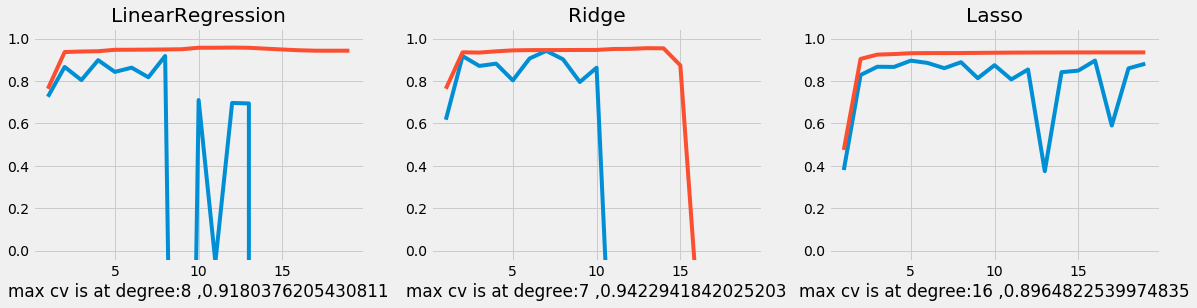

In [75]:
plt.figure(figsize=(18,4))
for no, score in enumerate(scores):
    plt.subplot(1,3,no+1)
    plt.ylim(-0.05, 1.05)
    plt.plot(score)
    plt.title(test_models[no].__class__.__name__)
    m = score.cv.argmax()
    plt.xlabel("max cv is at degree:"+str(m)+" ,"+str(score.cv[m]))

Let's try a few different values for $\alpha$ as well.

In [76]:
test_models[1:]

[Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False)]

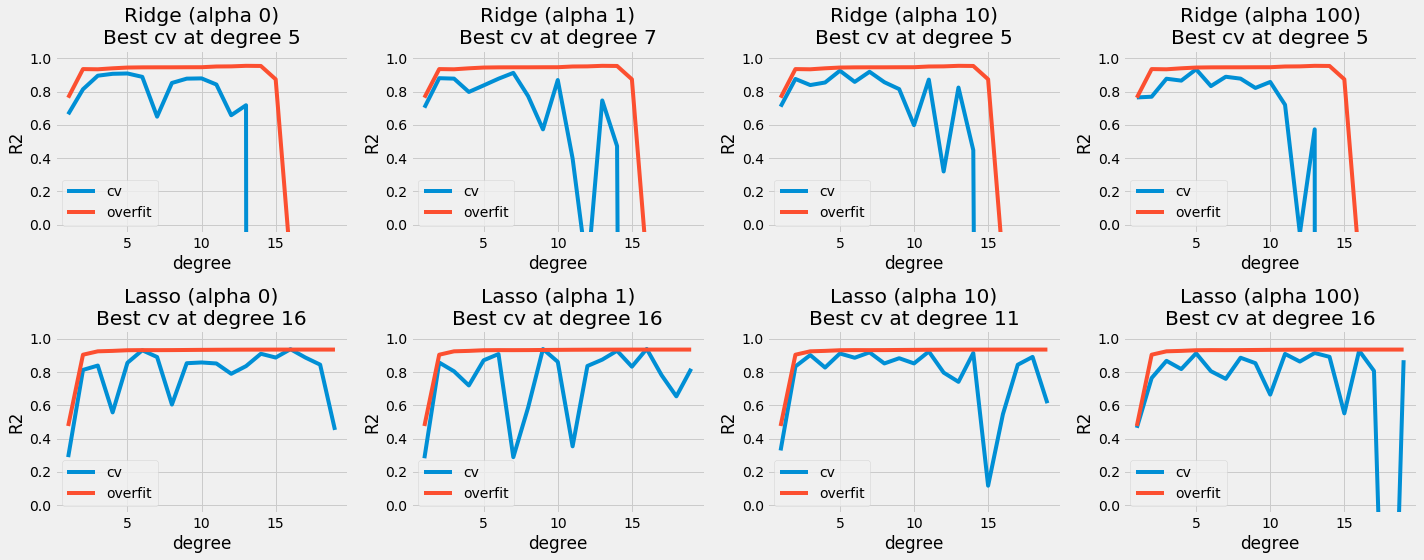

In [77]:
# plt.figure(figsize=(12,10))
fig, axes = plt.subplots(2,4, figsize=(20,8))
test_models = [Ridge(10), Lasso(10)]
# for col, alpha in enumerate([0, 1, 10, 100]):
#     scores = [analyze_performance(test_model, X, y_sample) for test_model in test_models]
#     for row, score in enumerate(scores) :
for col, alpha in enumerate([0, 1, 10, 100]):
    scores = [analyze_performance(my_model, X, y_sample) for my_model in test_models]
    for row, score in enumerate(scores):
#         plt.subplot(2,4, (row+col))
        s, name = pd.DataFrame(score), test_models[row].__class__.__name__
#         name = test_models[row].__class__.__name__
#         s = pd.DataFrame(score)
        f = s.plot(ylim=(-0.05, 1.05), ax=axes[row, col])
        f = axes[row, col].set_xlabel('degree'), axes[row, col].set_ylabel('R2')
        f = axes[row, col].set_title("%s (alpha %d)\nBest cv at degree %d" % (name, alpha, s.cv.argmax()))
        
plt.tight_layout()

### Resources:

- https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/
- http://connor-johnson.com/2014/02/18/linear-regression-with-python/
- http://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
- https://www.youtube.com/watch?v=nmHNXsDPPFQ
- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- http://setosa.io/ev/ordinary-least-squares-regression/
- https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

### Class work


Same exercise that we did in the previous class but now try polynomial and regularized models. on the King County housing dataset.

In [ ]:
kc = pd.read_csv("../../data/kc_house_data.csv")